In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import warnings
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('zpdes_states.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.participant.unique()

array(['Axelle', 'mabortoluzzi', 'aliz.tey', 'nolan', 'kelly.vin',
       'acastano', 'gaulard', 'audrey-baeyens', 'mangdoline', 'tilaborde',
       'bqueran', 'Ane', 'Susanne', 'Romain851'], dtype=object)

In [4]:
participant_name = 'Axelle'
columns = ['speed_values','tracking_duration_values','probe_duration_values','radius_values']
def transform_str_to_list(element):
    return [float(value) for value in element[1:-1].split(',')]
for col in columns: 
    df[col]=df[col].apply(transform_str_to_list)
df.head()

,participant,episode,main_index,main_value,speed_values,tracking_duration_values,probe_duration_values,radius_values,episode_sample,results
0,Axelle,0,0,0.05,"[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","{'MAIN': [0], 'nb2': [1, 1, 0, 0]}",1
1,Axelle,0,1,0.05,"[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","{'MAIN': [0], 'nb2': [1, 1, 0, 0]}",1
2,Axelle,0,2,0.00,"[0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","{'MAIN': [0], 'nb2': [1, 1, 0, 0]}",1
3,Axelle,0,3,0.00,"[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","{'MAIN': [0], 'nb2': [1, 1, 0, 0]}",1
4,Axelle,0,4,0.00,"[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]","{'MAIN': [0], 'nb2': [1, 1, 0, 0]}",1


In [5]:
df_participant = df[df['participant']=="Axelle"]
nb_episode = len(df_participant)//5
print('Nb_episode: ', nb_episode)

Nb_episode:  1023


interactive(children=(IntSlider(value=0, description='x', max=1023), IntText(value=0, description='y'), Output…

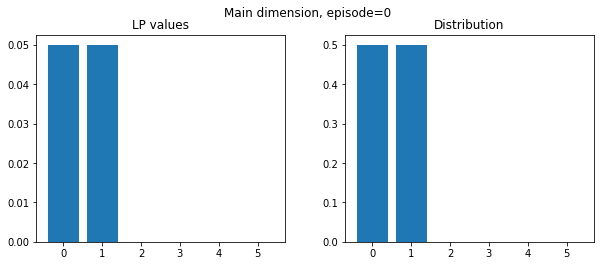

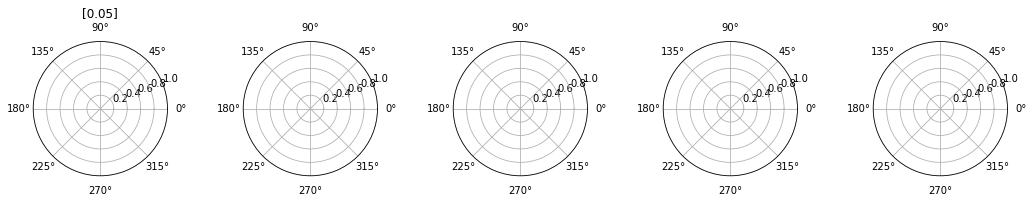

In [50]:
%matplotlib inline

index_episode = 0
input_text = widgets.IntText()
input_slider = widgets.IntSlider(min=0, max=nb_episode)
widgets.jslink((input_text, 'value'), (input_slider, 'value'))
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_max(list_values):
    """ returns: (min_index, max_index)"""
    max_index = np.where(np.array(list_values[0]) > 0)
    return max_index[0][-1]
    

def plot_histogram(x, y):
    index_episode = x
    support_main=[i for i in range(6)]
    df_participant_episode = df_participant.query(f'episode == {index_episode}')
    main_values = df_participant_episode['main_value'].values
    distrib_main = main_values  / sum(main_values)
    fig, axs = plt.subplots(1,2, figsize=(9,4))
    fig.tight_layout(pad=3.0)
    fig.suptitle(f'Main dimension, episode={index_episode}')
    axs[0].bar(support_main, main_values)
    axs[0].set_title("LP values")
    axs[1].bar(support_main, distrib_main)
    axs[1].set_title("Distribution")

def plot_radar(x,y):
    index_episode = x
    df_participant_episode = df_participant.query(f'episode == {index_episode}')
    fig, axs = plt.subplots(1,5, subplot_kw={'projection': 'polar'}, figsize=(15,15))
    fig.tight_layout(pad=3.0)
    support_sub=[i for i in range(5)] + [0]
    label_loc = np.linspace(start=0, stop=360, num=5)
    # label_loc = np.append(label_loc, [0])
    for idx, ax in enumerate(axs):
        sub_dim = df_participant_episode.query(f'main_index == {idx}')
        ax.set_title(sub_dim['main_value'].values)
        if(sub_dim['main_value'].values[0] == 0):
            ax.set_facecolor('black')
        else:
            speed_max = get_max(sub_dim['speed_values'].values)
            radius_max = get_max(sub_dim['radius_values'].values)
            tracking_max = get_max(sub_dim['tracking_duration_values'].values)
            probe_max = get_max(sub_dim['probe_duration_values'].values)
            activity_max = [speed_max, radius_max, tracking_max, probe_max, speed_max]
            print(highest_act_lvl)
            ax.plot(np.deg2rad(label_loc), activity_max)
            ax.set_thetagrids(angles=label_loc, labels=['speed','radius','tracking','probe','speed'])
            ax.set_rgrids(range(-1,1))
            print(sub_dim['radius_values'].values)
            print(radius_max)

def run_all(x,y):
    plot_histogram(x,y)
    plot_radar(x,y)
    
interactive(run_all, x=input_slider, y=input_text)

In [6]:
def get_min_max(list_values):
    """ returns: (min_index, max_index)"""
    return list_values.index(min(list_values)), list_values[::-1].index(max(list_values))
test=[2,2,1]
get_min_max(test)

(2, 1)

In [47]:
max([1,2,3])

3